In [1]:
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier

In [2]:
file = gzip.open('goemotions.json.gz')
json_file = json.load(file)

In [3]:
emotions = np.array([])
sentiments = np.array([])
posts = np.array([1])
json_file = np.asarray(json_file)

posts = json_file[:,0]
emotions = json_file[:,1]
sentiments = json_file[:,2]

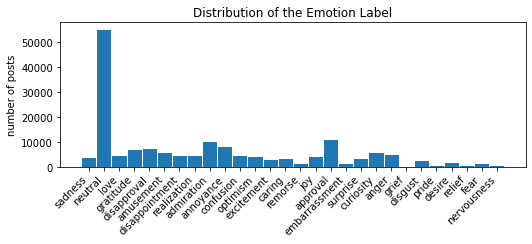

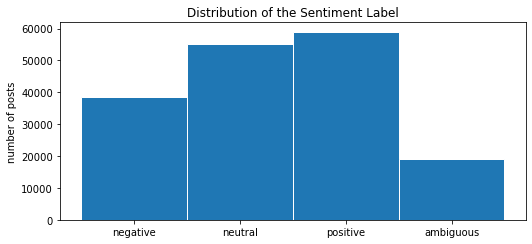

In [4]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.hist(emotions, bins=range(29), align="left", ec="white")
plt.xticks(rotation=45, ha="right")
plt.ylabel("number of posts")
plt.title("Distribution of the Emotion Label")
plt.savefig("emotion.pdf", format="pdf")
plt.show()
plt.ylabel("number of posts")
plt.hist(sentiments, bins=range(5), align="left", ec="white")
plt.title("Distribution of the Sentiment Label")
plt.savefig("sentiment.pdf", format="pdf")
plt.show()

In [5]:
# 2.1. Vectorizer
vectorizer = CountVectorizer()

In [6]:
text_dataset = vectorizer.fit_transform(posts)

In [8]:
"""
each column in the feature vector refers to a word/token.
each row in the feature vector is a post.
if said post uses a word in the vectorizer's vocabulary exactly once, then it will be shown as a 1
in the corresponding index of the vectorizer's vocabulary.
therefore, adding up the column for each column will give you the frequency of each word
"""
def word_frequencies(dataset, vocabulary):
    #add up the elements in the column for each column
    frequency_array = dataset.sum(axis=0).tolist()[0]
    
    #add up the list of frequencies to get total size of words
    total_sum = np.asarray(frequency_array).sum()
    
    #get words from feature vector
    words = vocabulary.keys()
    
    #get corresponding indices for words in feature vector
    indices = vocabulary.values()
    
    #since indices is a list of indices for the words at a 1:1 index, then we just map the frequencies value to the index
    #in the indices list and we get a list of sums that map to words list 1:1
    frequencies = list(map(lambda index: frequency_array[index], indices))
    
    #then just zip words list and frequencies list as a dictionary
    return dict(zip(words, frequencies)), total_sum

frequencies, total_sum = word_frequencies(text_dataset, vectorizer.vocabulary_)

In [9]:
frequencies

{'that': 37748,
 'game': 2323,
 'hurt': 469,
 'you': 42828,
 'do': 7370,
 'right': 3492,
 'if': 9684,
 'don': 8528,
 'care': 903,
 'then': 3460,
 'fuck': 1452,
 'em': 216,
 'man': 2955,
 'love': 5703,
 'reddit': 872,
 'name': 31843,
 'was': 15008,
 'nowhere': 71,
 'near': 229,
 'them': 5185,
 'he': 13361,
 'by': 3780,
 'the': 71411,
 'falcon': 9,
 'considering': 261,
 'it': 41895,
 'such': 1108,
 'an': 5780,
 'important': 343,
 'document': 26,
 'should': 3191,
 'know': 5592,
 'damned': 50,
 'thing': 2787,
 'backwards': 47,
 'and': 34790,
 'forwards': 16,
 'thanks': 3269,
 'again': 1337,
 'for': 21087,
 'help': 1363,
 'isn': 1836,
 'as': 8490,
 'big': 1190,
 'but': 13752,
 'still': 3662,
 'quite': 441,
 'popular': 119,
 've': 4431,
 'heard': 806,
 'same': 2670,
 'about': 7816,
 'his': 5074,
 'content': 155,
 'never': 3319,
 'watched': 303,
 'him': 4999,
 'much': 3644,
 'crazy': 694,
 'went': 845,
 'to': 49931,
 'super': 709,
 'religion': 574,
 'high': 787,
 'school': 765,
 'think': 5864

In [10]:
# 2.2 Splitting the dataset
training_set, test_set = train_test_split(json_file,train_size=0.8)

# training set
X_train = training_set[:, 0]
y_train = training_set[:, 1:]

# test set
X_test = test_set[:, 0]
y_test = test_set[:, 1:]

In [11]:
# mlp_model = MLPClassifier()
# X_train_mlp, X_test_mlp = train_test_split(text_dataset,train_size=0.8)

In [13]:
# sentiments_vectorizer = CountVectorizer()
# sentiments_vectorizer.fit_transform(sentiments)

# emotions_vectorizer = CountVectorizer()
# emotions_vectorizer.fit_transform(emotions)

<171820x28 sparse matrix of type '<class 'numpy.int64'>'
	with 171820 stored elements in Compressed Sparse Row format>

In [44]:
# sentiments_num = np.asarray(list(map(lambda s: sentiments_vectorizer.vocabulary_[s], sentiments)))
# emotions_num = np.asarray(list(map(lambda e: emotions_vectorizer.vocabulary_[e], emotions)))

# sentiments_train_mlp, sentiments_test_mlp = train_test_split(sentiments_num,train_size=0.8)
# emotions_train_mlp, emotions_test_mlp = train_test_split(emotions_num,train_size=0.8)

In [45]:
# print(X_train_mlp.shape)
# print(sentiments_train_mlp.shape)

(137456, 30449)
(137456,)


In [81]:
# mlp_model.fit(X_train_mlp, sentiments_train_mlp)

MemoryError: Unable to allocate 31.2 GiB for an array with shape (137456, 30449) and data type int64